In [4]:
import numpy as np
from keras.applications import vgg16, VGG16
from keras.preprocessing import image

In [5]:
model = VGG16(weights='imagenet')

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

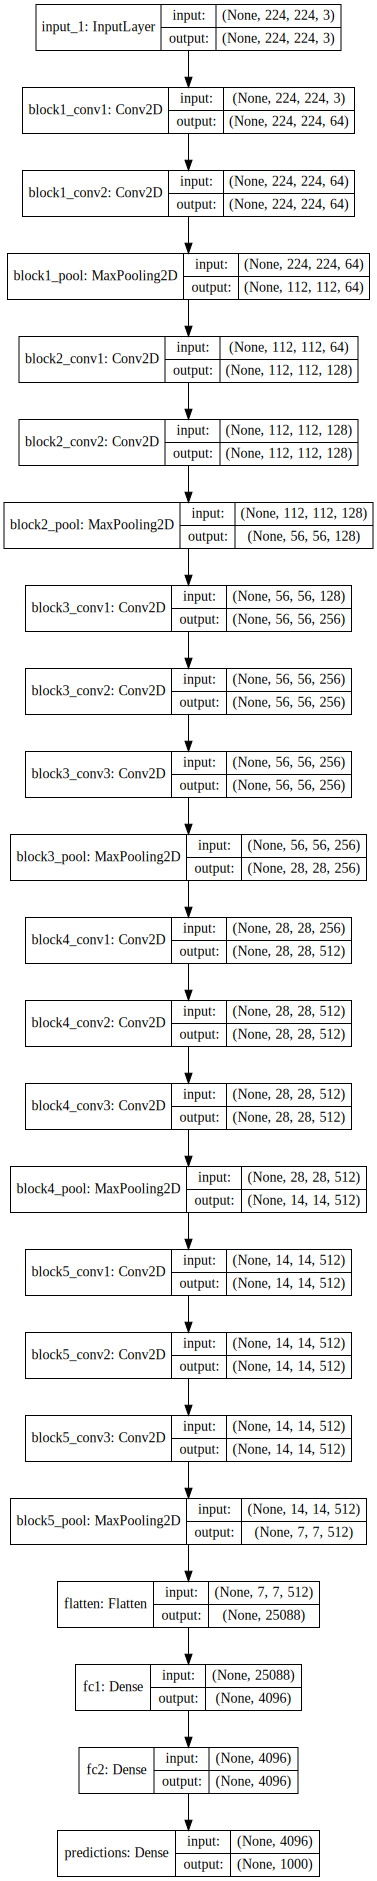

In [11]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

## Test image 1

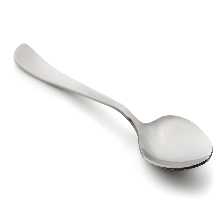

In [3]:
img = image.load_img('img/spoon.jpeg', target_size=(224, 224))
img

In [4]:
# Convert to Numpy array
arr = image.img_to_array(img)
arr.shape

(224, 224, 3)

In [5]:
# expand dimension
arr = np.expand_dims(arr, axis=0)
arr.shape

(1, 224, 224, 3)

In [6]:
# preprocessing
arr = vgg16.preprocess_input(arr)
arr

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


In [7]:
# predict

#arr = arr.reshape(1, 224, 224, 3)

preds = model.predict(arr)
preds

array([[8.44573549e-08, 3.89304603e-07, 3.81987064e-07, 2.99430371e-06,
        3.04706737e-05, 1.56404989e-04, 1.96297551e-05, 5.69106149e-08,
        1.55567832e-07, 2.09416378e-08, 2.18210829e-07, 8.64055565e-08,
        1.40145900e-07, 1.38309031e-06, 2.69006240e-08, 4.38312391e-08,
        1.01769137e-06, 1.59495485e-07, 2.74518527e-07, 6.50163770e-07,
        1.09401856e-06, 7.74872490e-07, 5.44522898e-08, 8.13307537e-08,
        4.53290667e-08, 8.52787778e-08, 4.27181668e-08, 9.65319202e-08,
        2.15970118e-07, 1.06834278e-07, 2.91652817e-08, 4.16023234e-08,
        3.74264708e-08, 8.28798292e-08, 2.43751884e-07, 5.07891045e-08,
        1.69841982e-07, 1.09263745e-07, 1.37065470e-07, 3.46905615e-08,
        5.66829897e-07, 6.84126817e-08, 4.47843078e-08, 5.61311957e-08,
        5.66270373e-08, 7.42565520e-09, 9.62565991e-08, 1.42699491e-07,
        4.12455714e-09, 1.75292503e-09, 1.59966262e-08, 9.13648250e-07,
        1.57508759e-06, 2.62329786e-06, 2.34179858e-08, 9.452129

In [8]:
# prediction for top 5
vgg16.decode_predictions(preds, top=5)

[[('n03633091', 'ladle', 0.74310976),
  ('n04597913', 'wooden_spoon', 0.111867145),
  ('n04270147', 'spatula', 0.046126764),
  ('n04332243', 'strainer', 0.04293128),
  ('n03658185', 'letter_opener', 0.010525409)]]

## Testing image 2

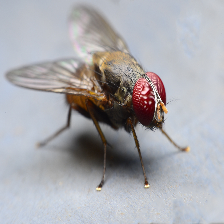

In [21]:
img2 = image.load_img('img/fly.jpeg', target_size=(224, 224))
img2

In [22]:
arr2 = image.img_to_array(img2)
arr2

array([[[173., 181., 194.],
        [174., 182., 193.],
        [173., 181., 192.],
        ...,
        [194., 195., 199.],
        [193., 194., 198.],
        [194., 195., 199.]],

       [[173., 181., 194.],
        [175., 183., 196.],
        [174., 182., 195.],
        ...,
        [191., 194., 199.],
        [191., 194., 199.],
        [192., 196., 199.]],

       [[178., 182., 194.],
        [174., 182., 195.],
        [174., 182., 193.],
        ...,
        [193., 196., 201.],
        [194., 197., 202.],
        [192., 195., 200.]],

       ...,

       [[199., 207., 220.],
        [196., 205., 220.],
        [195., 204., 221.],
        ...,
        [196., 199., 206.],
        [196., 201., 207.],
        [198., 203., 207.]],

       [[194., 203., 218.],
        [194., 206., 222.],
        [195., 204., 219.],
        ...,
        [187., 188., 192.],
        [190., 189., 194.],
        [190., 191., 195.]],

       [[193., 205., 221.],
        [195., 202., 218.],
        [193., 2

In [23]:
arr2 = np.expand_dims(arr2, axis=0)
arr2.shape

(1, 224, 224, 3)

In [24]:
arr2 = vgg16.preprocess_input(arr2)
arr2

array([[[[ 90.061,  64.221,  49.32 ],
         [ 89.061,  65.221,  50.32 ],
         [ 88.061,  64.221,  49.32 ],
         ...,
         [ 95.061,  78.221,  70.32 ],
         [ 94.061,  77.221,  69.32 ],
         [ 95.061,  78.221,  70.32 ]],

        [[ 90.061,  64.221,  49.32 ],
         [ 92.061,  66.221,  51.32 ],
         [ 91.061,  65.221,  50.32 ],
         ...,
         [ 95.061,  77.221,  67.32 ],
         [ 95.061,  77.221,  67.32 ],
         [ 95.061,  79.221,  68.32 ]],

        [[ 90.061,  65.221,  54.32 ],
         [ 91.061,  65.221,  50.32 ],
         [ 89.061,  65.221,  50.32 ],
         ...,
         [ 97.061,  79.221,  69.32 ],
         [ 98.061,  80.221,  70.32 ],
         [ 96.061,  78.221,  68.32 ]],

        ...,

        [[116.061,  90.221,  75.32 ],
         [116.061,  88.221,  72.32 ],
         [117.061,  87.221,  71.32 ],
         ...,
         [102.061,  82.221,  72.32 ],
         [103.061,  84.221,  72.32 ],
         [103.061,  86.221,  74.32 ]],

        [[

In [28]:
preds2 = model.predict(arr2)
preds2

array([[5.41155554e-13, 9.89848536e-10, 8.36403429e-12, 4.00861527e-13,
        1.72097579e-13, 1.40023678e-11, 1.35437549e-12, 5.04422148e-09,
        4.88431739e-10, 4.90470664e-10, 2.76156542e-09, 2.95161007e-09,
        2.56515289e-08, 1.44856316e-09, 1.89005744e-09, 2.06205470e-08,
        4.16233448e-09, 7.90771407e-11, 6.24919630e-11, 3.17749982e-09,
        2.40682474e-09, 5.44554332e-11, 1.95373058e-11, 5.42423051e-11,
        8.48980816e-11, 3.45825694e-11, 2.29822723e-11, 5.76123628e-11,
        2.89066670e-11, 6.70596228e-13, 2.28363283e-11, 1.03508842e-11,
        6.69851605e-11, 3.28963592e-11, 5.91279239e-12, 2.11501042e-11,
        5.18305121e-10, 6.10155815e-11, 1.33588843e-11, 3.30259127e-12,
        9.54766058e-11, 6.89779553e-11, 2.17976852e-11, 6.55996507e-11,
        3.17909067e-11, 6.38637884e-12, 3.23544247e-11, 2.74477815e-12,
        1.18123230e-13, 2.12028832e-12, 1.83850201e-12, 1.81796228e-13,
        1.08996326e-10, 1.06553912e-10, 4.69153189e-11, 2.350811

In [29]:
vgg16.decode_predictions(preds2, top=5)

[[('n02190166', 'fly', 0.9977689),
  ('n02206856', 'bee', 0.0013271902),
  ('n02219486', 'ant', 0.00063573825),
  ('n02264363', 'lacewing', 9.1145186e-05),
  ('n02256656', 'cicada', 2.9562361e-05)]]